In [1]:
train_set_dir='~/Downloads/NoAuction_DecPre/NoAuction_DecPre_Training/'
test_set_dir='~/Downloads/NoAuction_DecPre/NoAuction_DecPre_Testing/'
original_files=[test_set_dir+f'Test_Dst_NoAuction_DecPre_CF_{ordinal}.txt' for ordinal in range(1,9+1)]
original_files.insert(0,train_set_dir+'Train_Dst_NoAuction_DecPre_CF_1.txt')
print(original_files)

['~/Downloads/NoAuction_DecPre/NoAuction_DecPre_Training/Train_Dst_NoAuction_DecPre_CF_1.txt', '~/Downloads/NoAuction_DecPre/NoAuction_DecPre_Testing/Test_Dst_NoAuction_DecPre_CF_1.txt', '~/Downloads/NoAuction_DecPre/NoAuction_DecPre_Testing/Test_Dst_NoAuction_DecPre_CF_2.txt', '~/Downloads/NoAuction_DecPre/NoAuction_DecPre_Testing/Test_Dst_NoAuction_DecPre_CF_3.txt', '~/Downloads/NoAuction_DecPre/NoAuction_DecPre_Testing/Test_Dst_NoAuction_DecPre_CF_4.txt', '~/Downloads/NoAuction_DecPre/NoAuction_DecPre_Testing/Test_Dst_NoAuction_DecPre_CF_5.txt', '~/Downloads/NoAuction_DecPre/NoAuction_DecPre_Testing/Test_Dst_NoAuction_DecPre_CF_6.txt', '~/Downloads/NoAuction_DecPre/NoAuction_DecPre_Testing/Test_Dst_NoAuction_DecPre_CF_7.txt', '~/Downloads/NoAuction_DecPre/NoAuction_DecPre_Testing/Test_Dst_NoAuction_DecPre_CF_8.txt', '~/Downloads/NoAuction_DecPre/NoAuction_DecPre_Testing/Test_Dst_NoAuction_DecPre_CF_9.txt']


In [2]:
from numpy.core._multiarray_umath import arange
from pandas import DataFrame
from numpy.lib.function_base import append

def info_parser(a_dataframe):
    """

    :param a_dataframe:
    :return:
    """
    temp1=arange(a_dataframe.shape[1])    # 含从0开始，「列」长个数的ndarray：[0,1,2,...,col_width - 1]
    break_loc=temp1[a_dataframe.iloc[0].diff().abs()>0.01] # 取第0行数据并左右看看哪里的数据差>0.01,并将>0.01处的列序号存入break_loc
    break_loc=append(arr=break_loc,values=a_dataframe.shape[1]) # 把列末尾加进去

    return break_loc

~/Downloads/NoAuction_DecPre/NoAuction_DecPre_Training/Train_Dst_NoAuction_DecPre_CF_1.txt
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Columns: 39512 entries, 0 to 39511
dtypes: float64(39512)
memory usage: 44.9 MB
[array([ 3454,  9772, 14694, 25413, 39512])]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
~/Downloads/NoAuction_DecPre/NoAuction_DecPre_Testing/Test_Dst_NoAuction_DecPre_CF_1.txt
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Columns: 38397 entries, 0 to 38396
dtypes: float64(38397)
memory usage: 43.6 MB
[array([ 3454,  9772, 14694, 25413, 39512]), array([ 5079, 11201, 17166, 23878, 38397])]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
~/Downloads/NoAuctio

<Figure size 432x288 with 0 Axes>

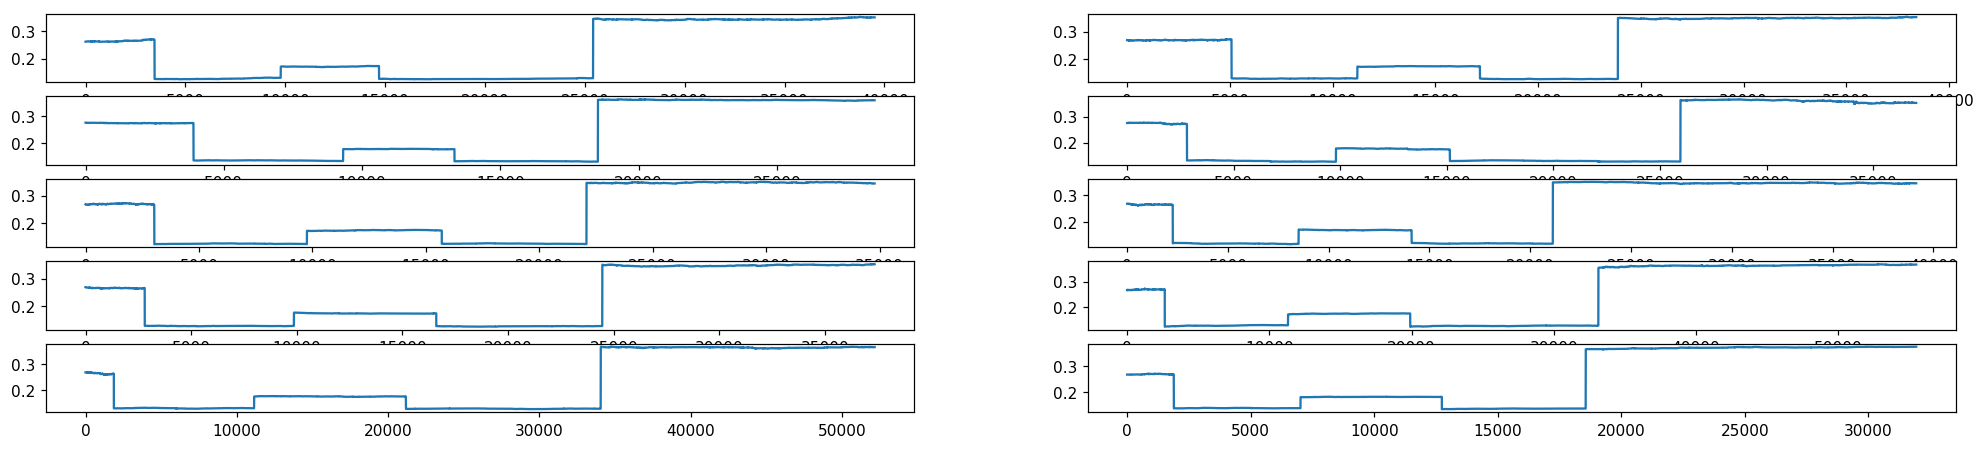

In [3]:
from pandas.io.parsers import read_fwf
import matplotlib.pyplot as pyplot
import time
%matplotlib inline

information=[]

pyplot.tight_layout()
pyplot.figure(figsize=(22.4,4.8),dpi=110)

tic=time.process_time()
for index, file_path in enumerate(original_files):
    print(file_path)
    this_dataframe=read_fwf(filepath_or_buffer=file_path,header=None)
    this_dataframe.info()
    information.append(info_parser(a_dataframe=this_dataframe))
    print(information)
    print('-'*180)
    pyplot.subplot(5,2,index+1)
    this_dataframe.iloc[0].plot()
toc=time.process_time()
processed_time=(toc-tic)*1000
print('Processed time = '+str(processed_time)+' ms.')

<Figure size 432x288 with 0 Axes>

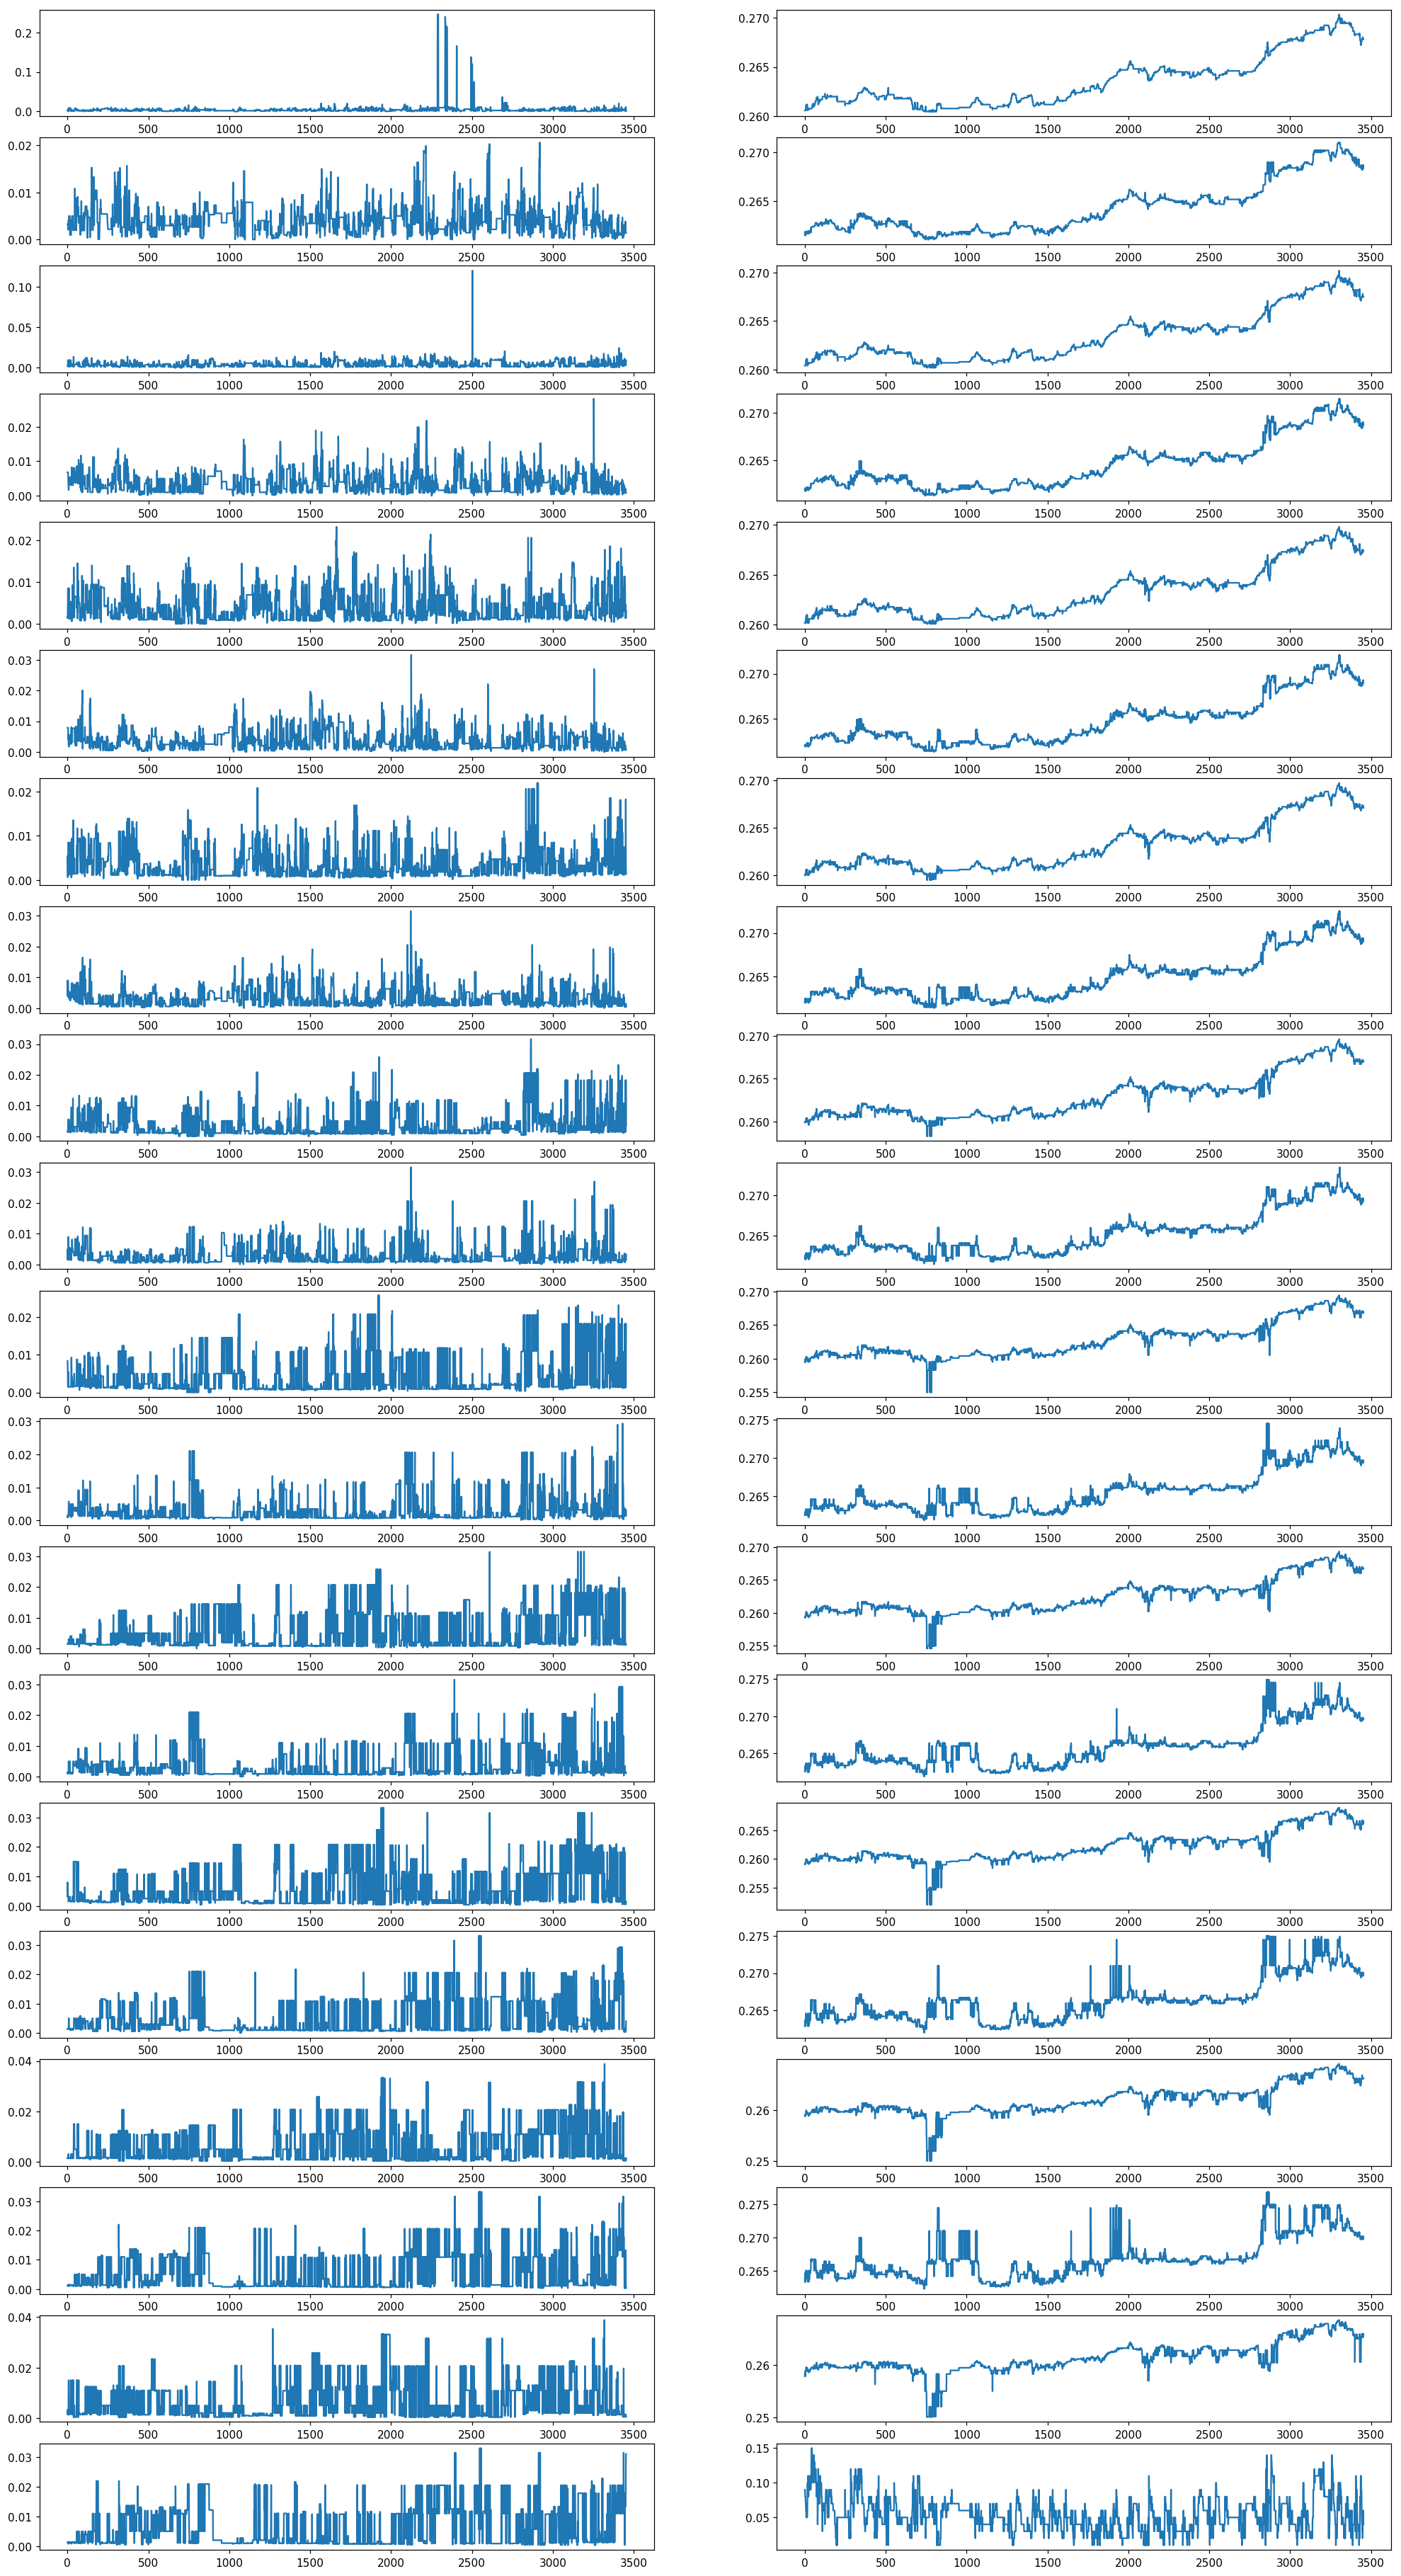

In [4]:
first_day_data=read_fwf(filepath_or_buffer=original_files[0],header=None)   # 第一天

pyplot.tight_layout()
pyplot.figure(figsize=(22.4,43.2),dpi=110)

for each_row in range(1,41):
    pyplot.subplot(20,2,each_row)
    first_day_data.iloc[each_row,:3454].plot()   # 到第一只股票

<Figure size 432x288 with 0 Axes>

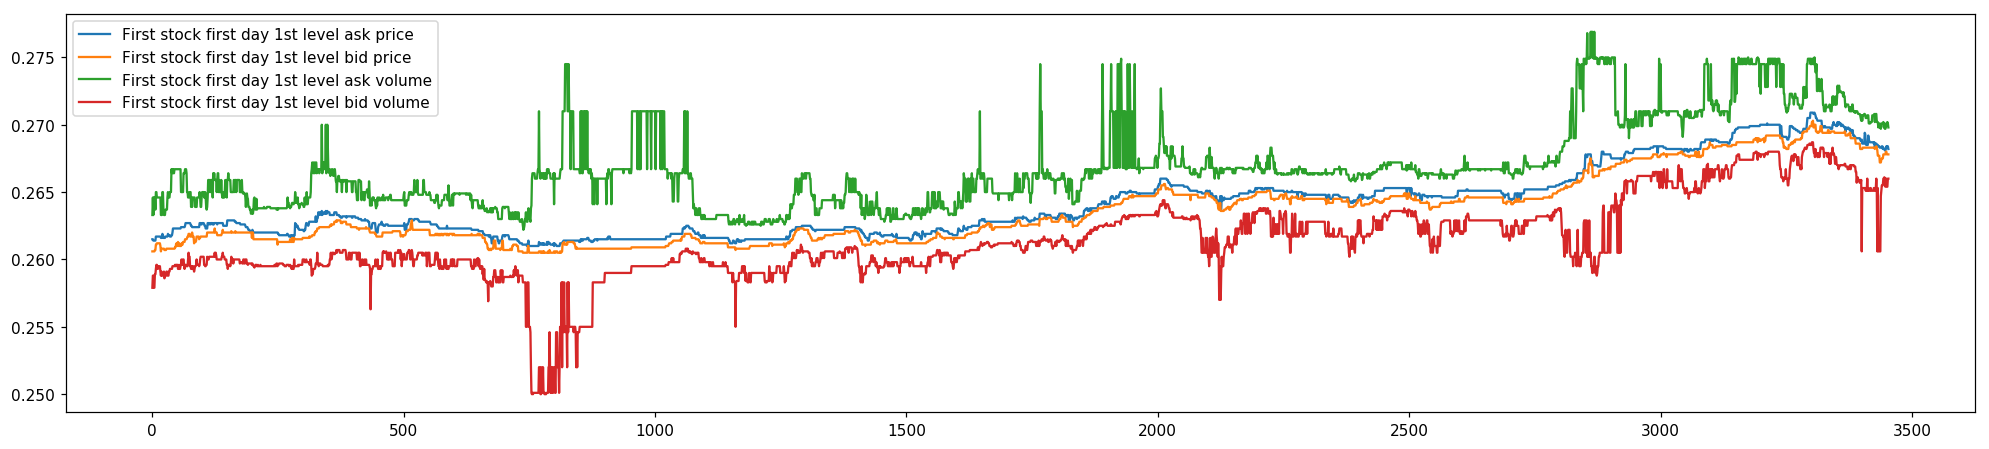

In [10]:
pyplot.tight_layout()
pyplot.figure(figsize=(22.4,4.8),dpi=110)

first_day_data.iloc[0,:3454].plot(label='First stock first day 1st level ask price')
first_day_data.iloc[2,:3454].plot(label='First stock first day 1st level bid price')
first_day_data.iloc[36,:3454].plot(label='First stock first day 1st level ask volume')
first_day_data.iloc[38,:3454].plot(label='First stock first day 1st level bid volume')

pyplot.legend()

In [4]:
from mypkg.generate_pkl import convert_multiple_days_data_to_a_dataframe

train_dataframe=convert_multiple_days_data_to_a_dataframe(selected_train_or_test_days=[0,1])
print(train_dataframe.shape)
print(train_dataframe.info)
train_dataframe.head()
test_dataframe=convert_multiple_days_data_to_a_dataframe(selected_train_or_test_days=[6])

(77909, 149)
<bound method DataFrame.info of             0         1         2         3         4         5         6    \
0      0.408275 -0.509405  0.403577 -0.479331  0.409877 -0.663252  0.402914   
1      0.408275 -0.604272  0.403577 -0.479331  0.410898 -0.683978  0.402914   
2      0.407254 -0.663731  0.403577 -0.479331  0.406815 -0.663252  0.402914   
3      0.407254 -0.530115  0.403577 -0.479331  0.408857 -0.238357  0.402914   
4      0.407254 -0.530115  0.403577 -0.479331  0.408857 -0.238357  0.402914   
5      0.407254 -0.530115  0.404600 -0.531439  0.408857 -0.446199  0.404960   
6      0.407254 -0.737220  0.404600 -0.442366  0.407836 -0.629283  0.404960   
7      0.410317 -0.131941  0.408691 -0.446374  0.410898 -0.289022  0.408029   
8      0.410317 -0.198749  0.408691 -0.446374  0.409877 -0.712190  0.408029   
9      0.410317 -0.198749  0.409714 -0.401837  0.409877 -0.712190  0.410075   
10     0.410317 -0.198749  0.409714 -0.401837  0.409877 -0.712190  0.410075   
11     

In [2]:
from numpy.core._multiarray_umath import array
from numpy.lib.function_base import diff
from numpy.core.fromnumeric import repeat

def my_repeated_index(days):
    """

    :param days:
    :return:
    """
    offsets = array([[0, 3454, 9772, 14694, 25413, 39512],  # 每一行是一天，每两个数之差代表某一只股票的数据量
                     [0, 5079, 11201, 17166, 23878, 38397],
                     [0, 3903, 9314, 13341, 18527, 28535],
                     [0, 2806, 9798, 15140, 25959, 37023],
                     [0, 3030, 9758, 15704, 22082, 34785],
                     [0, 2263, 8506, 14113, 21120, 39152],
                     [0, 2801, 9861, 16601, 24455, 37346],
                     [0, 2647, 11309, 19900, 33129, 55478],
                     [0, 1873, 11144, 21180, 34060, 52172],
                     [0, 1888, 7016, 12738, 18559, 31937]])

    index=[repeat(a=[0,1,2,3,4],repeats=diff(offsets)[day]) for day in days]    # [0*repeats次, 1*repeats次, ...]

    return index

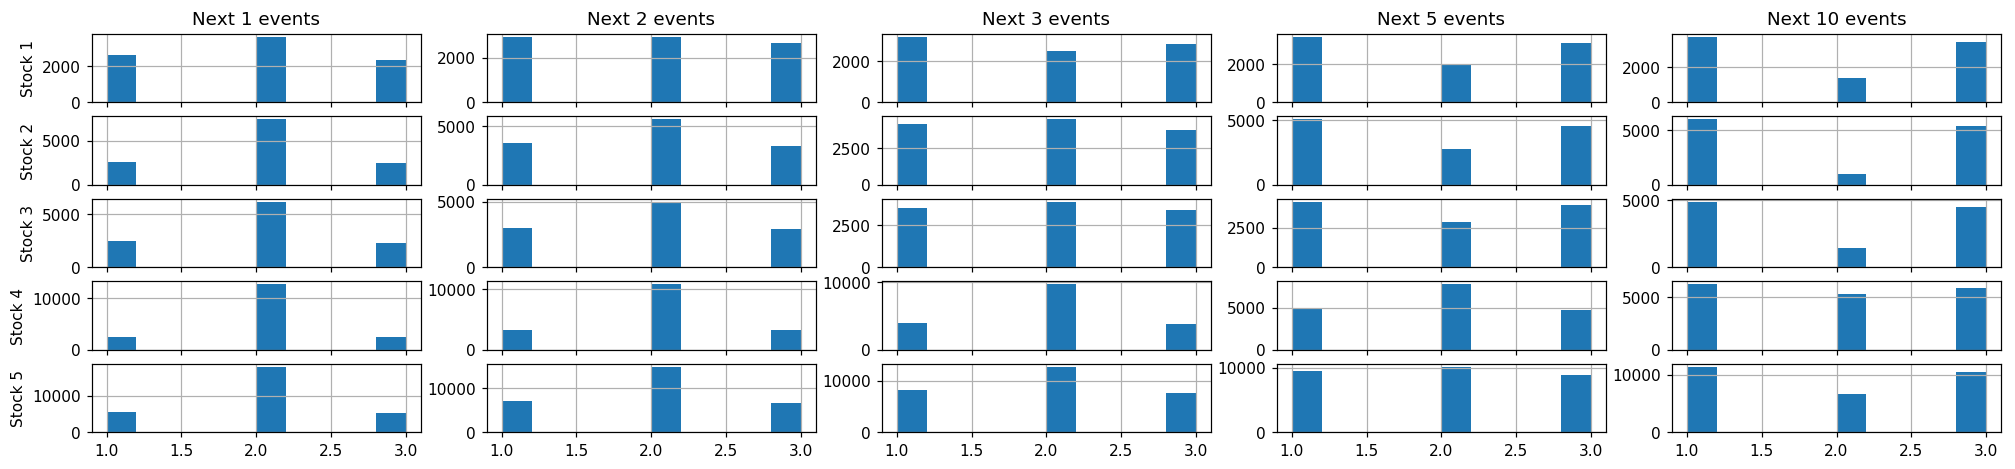

In [6]:
# from mypkg.generate_pkl import my_repeated_index
from numpy.core._multiarray_umath import array
import matplotlib.pyplot as pyplot

duplicated_index=my_repeated_index([0,1])
recurred_index=array([values for returned_list in duplicated_index for values in returned_list])

horizon=[1,2,3,5,10]
figure,axes=pyplot.subplots(nrows=5,ncols=5,sharex=True,figsize=(22.4,4.8),dpi=110)
for index in range(5):
    this_row=recurred_index==index
    for j,k in enumerate([144,145,146,147,148]):
        train_dataframe.loc[this_row][k].hist(ax=axes[index,j])
        if 0==index:
            axes[0,j].set_title('Next '+str(horizon[j])+ ' events')
        if 0==j:
            axes[index,0].set_ylabel('Stock '+str(index+1))

In [2]:
from sklearn.ensemble.forest import RandomForestClassifier

label_rows=[144,145,146,147,148]

classifier=RandomForestClassifier(n_estimators=100,max_depth=3,random_state=0,class_weight='balanced')

for i,j in enumerate(label_rows):
    model=classifier.fit(train_dataframe.iloc[:,range(144)].values,train_dataframe.iloc[:,j].values)
    y_hat=model.predict(test_dataframe.iloc[:,range(144)].values)


In [4]:
from numpy.lib.function_base import flip
from numpy.core.fromnumeric import argsort

top_10_features=flip(argsort(classifier.feature_importances_),axis=0)[:10]
print(top_10_features)

[69 88 87 86 91 82 98 89 92 93]
